In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
vehicles_dir = r'C:\Users\medep\Downloads\archive (5)\data1\vehicles'
non_vehicles_dir = r'C:\Users\medep\Downloads\archive (5)\data1\non-vehicles'

In [3]:
def load_images_from_dir(directory):
    images = []
    for filename in os.listdir(directory):
        img_path = os.path.join(directory, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img / 255.0
        images.append(img)
    return images

In [4]:
vehicle_images = load_images_from_dir(vehicles_dir)
non_vehicle_images = load_images_from_dir(non_vehicles_dir)

In [5]:
vehicle_labels = np.ones(len(vehicle_images))
non_vehicle_labels = np.zeros(len(non_vehicle_images))

all_images = np.array(vehicle_images + non_vehicle_images)
all_labels = np.concatenate([vehicle_labels, non_vehicle_labels])

In [6]:
random_index = random.randint(0, len(all_images) - 1)

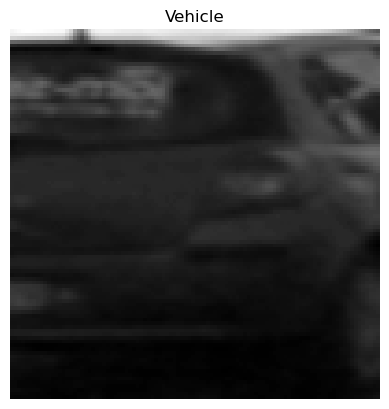

In [7]:
plt.imshow(all_images[random_index], cmap='gray')
plt.axis('off')
if random_index < len(vehicle_images):
    plt.title("Vehicle")
else:
    plt.title("Non-vehicle")
plt.show()

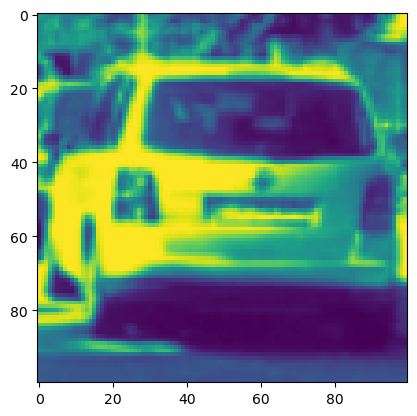

In [8]:
plt.imshow(all_images[7]);

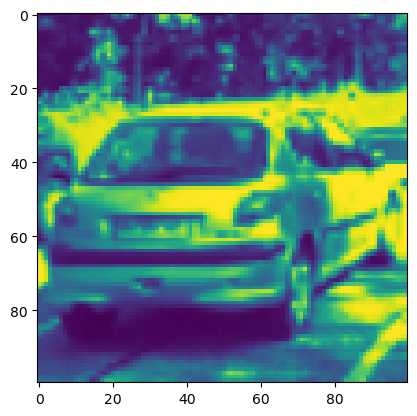

In [9]:
plt.imshow(all_images[1230]);

In [10]:
random_indices = np.random.permutation(len(all_images))
all_images_shuffled = all_images[random_indices]
all_labels_shuffled = all_labels[random_indices]

In [11]:
all_images_shuffled = all_images_shuffled.reshape((-1, 100, 100, 1))

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras import layers, models, callbacks

In [13]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
history = model.fit(all_images_shuffled, all_labels_shuffled, epochs=5, batch_size=32)

Epoch 1/5
383/383 [==============================] - 26s 69ms/step - loss: 0.0186 - accuracy: 0.9936
Epoch 2/5
383/383 [==============================] - 25s 66ms/step - loss: 0.0135 - accuracy: 0.9953
Epoch 3/5
383/383 [==============================] - 25s 65ms/step - loss: 0.0223 - accuracy: 0.9930
Epoch 4/5
383/383 [==============================] - 27s 70ms/step - loss: 0.0068 - accuracy: 0.9983
Epoch 5/5
383/383 [==============================] - 27s 70ms/step - loss: 0.0170 - accuracy: 0.9952


In [16]:
model.save('vehidetect.h5')

C:\Users\medep\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
loss, accuracy = model.evaluate(all_images_shuffled, all_labels_shuffled)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

383/383 [==============================] - 8s 20ms/step - loss: 0.0159 - accuracy: 0.9939
Test loss: 0.01586209423840046
Test accuracy: 0.9939468502998352


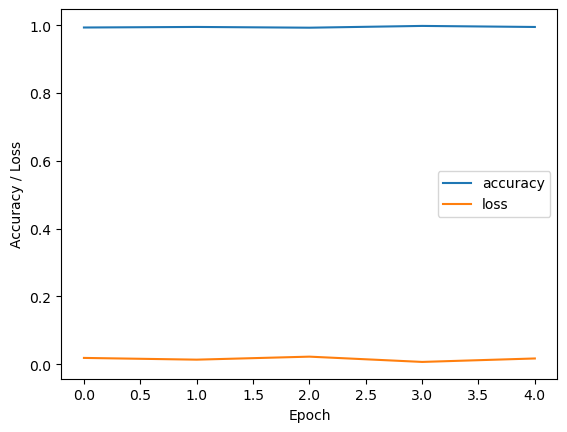

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()

In [25]:
probabilities = model.predict(all_images_shuffled)

383/383 [==============================] - 9s 22ms/step


In [26]:
predictions = np.where(probabilities > 0.5, 1, 0)

In [27]:
report = classification_report(all_labels_shuffled, predictions)

print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      3433
         1.0       1.00      0.99      1.00      8792

    accuracy                           0.99     12225
   macro avg       0.99      1.00      0.99     12225
weighted avg       0.99      0.99      0.99     12225



1/1 [==============================] - 0s 31ms/step


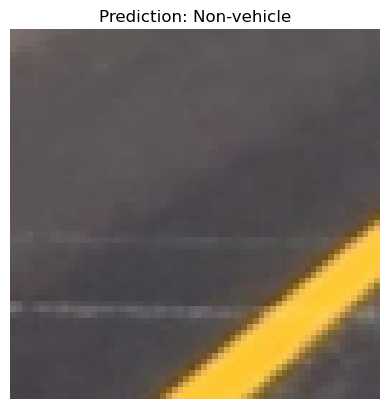

In [34]:
def predict_single_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (100, 100))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = img / 255.0
    img = img.reshape((1, 100, 100, 1)) 

    probabilities = model.predict(img)

    if probabilities[0][0] > 0.5:
        prediction = "Vehicle"
    else:
        prediction = "Non-vehicle"
    
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {prediction}")
    plt.axis('off')
    plt.show()

image_path = r"C:\Users\medep\Downloads\archive (5)\data1\non-vehicles\extra459.png"
predict_single_image(image_path)

1/1 [==============================] - 0s 39ms/step


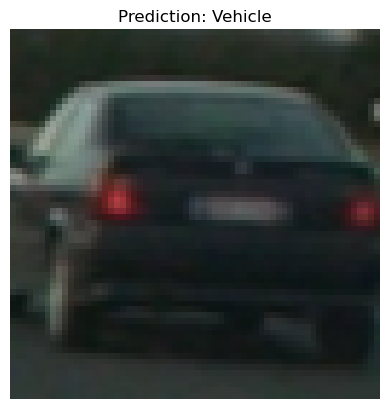

In [35]:
image_path = r"C:\Users\medep\Downloads\archive (5)\data1\vehicles\right (487).png"
predict_single_image(image_path)